In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('finalresults.csv')

In [3]:
df.head()

,Dataset,model,model_combined_name,k_for_knn,layer_size,depth_for_DT,training_acc,training_f1,training_ps,training_recall,...,MLP_Attacker_Advantage,RF_AUC,RF_PPV,RF_Attacker_Advantage,TH_AUC,TH_PPV,TH_Attacker_Advantage,MAX_AUC,MAX_PPV,MAX_Attacker_Advantage
0,Titanic,KNN,KNN3,3.0,NaN,NaN,0.850048,0.840031,0.842439,0.837928,...,0.15,0.55,0.97,0.15,0.49,0.8,0.02,0.71,0.97,0.41
1,Titanic,KNN,KNN4,4.0,NaN,NaN,0.825215,0.801780,0.840662,0.788012,...,0.27,0.62,0.89,0.28,0.49,0.8,0.02,0.62,0.97,0.28
2,Titanic,KNN,KNN5,5.0,NaN,NaN,0.830946,0.819281,0.822356,0.816718,...,0.24,0.53,0.97,0.15,0.49,0.8,0.02,0.65,0.97,0.25
3,Titanic,KNN,KNN10,10.0,NaN,NaN,0.784145,0.761129,0.779619,0.752907,...,0.25,0.53,0.89,0.15,0.49,0.8,0.02,0.57,0.97,0.26
4,Titanic,KNN,KNN15,15.0,NaN,NaN,0.767908,0.745921,0.757917,0.739789,...,0.28,0.48,0.86,0.17,0.49,0.8,0.02,0.69,0.94,0.37


In [4]:
df.model.value_counts()

KNN             15
MLP             15
DecisionTree    15
LR               3
Name: model, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dataset                 48 non-null     object 
 1   model                   48 non-null     object 
 2   model_combined_name     48 non-null     object 
 3   k_for_knn               15 non-null     float64
 4   layer_size              15 non-null     object 
 5   depth_for_DT            15 non-null     float64
 6   training_acc            48 non-null     float64
 7   training_f1             48 non-null     float64
 8   training_ps             48 non-null     float64
 9   training_recall         48 non-null     float64
 10  testing_acc             48 non-null     float64
 11  testing_f1              48 non-null     float64
 12  testing_ps              48 non-null     float64
 13  testing_recall          48 non-null     float64
 14  gen_gap                 48 non-null     floa

In [7]:
df.describe()

,k_for_knn,depth_for_DT,training_acc,training_f1,training_ps,training_recall,testing_acc,testing_f1,testing_ps,testing_recall,...,MLP_Attacker_Advantage,RF_AUC,RF_PPV,RF_Attacker_Advantage,TH_AUC,TH_PPV,TH_Attacker_Advantage,MAX_AUC,MAX_PPV,MAX_Attacker_Advantage
count,15.000000,15.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000
mean,7.400000,7.400000,0.847942,0.793853,0.825121,0.782648,0.838121,0.773796,0.794835,0.770787,...,0.287083,0.517917,0.919167,0.241875,0.503125,0.812708,0.019167,0.62375,0.945000,0.328958
std,4.656792,4.656792,0.045577,0.096405,0.067692,0.103438,0.090617,0.139039,0.115027,0.147536,...,0.052913,0.085002,0.036310,0.055416,0.016651,0.032599,0.024567,0.05745,0.020421,0.043331
min,3.000000,3.000000,0.766953,0.564954,0.705469,0.562252,0.694656,0.550719,0.648314,0.549961,...,0.150000,0.370000,0.810000,0.120000,0.490000,0.800000,0.000000,0.50000,0.870000,0.230000
25%,4.000000,4.000000,0.821724,0.743906,0.773111,0.714015,0.789615,0.660895,0.691600,0.649063,...,0.247500,0.427500,0.890000,0.210000,0.490000,0.800000,0.000000,0.57000,0.940000,0.297500
50%,5.000000,5.000000,0.850048,0.834844,0.845475,0.831187,0.825385,0.720270,0.736239,0.720031,...,0.280000,0.530000,0.930000,0.260000,0.500000,0.800000,0.020000,0.64000,0.940000,0.340000
75%,10.000000,10.000000,0.854107,0.842793,0.849937,0.839088,0.923664,0.919730,0.912330,0.933312,...,0.330000,0.590000,0.942500,0.280000,0.510000,0.810000,0.020000,0.67000,0.950000,0.360000
max,15.000000,15.000000,0.990571,0.987886,0.991481,0.984337,0.965649,0.963245,0.958827,0.968516,...,0.380000,0.650000,0.980000,0.330000,0.570000,0.980000,0.130000,0.71000,0.980000,0.410000


## Model-wise analysis: 
1. pick a model
2. check model attack AUC vs. a particular parameter from analysis params
Checking model attack max AUC vs. particular 

In [10]:
analysis_params = df.columns[6:15]
print(analysis_params)

Index(['training_acc', 'training_f1', 'training_ps', 'training_recall',
       'testing_acc', 'testing_f1', 'testing_ps', 'testing_recall', 'gen_gap'],
      dtype='object')


In [11]:
df_knn = df.loc[df.model == 'KNN']

In [13]:
df_knn.head()
df_knn.shape

(15, 34)

In [16]:
df_knn

,Dataset,model,k_for_knn,training_acc,training_f1,training_ps,training_recall,testing_acc,testing_f1,testing_ps,...,MLP_Attacker_Advantage,RF_AUC,RF_PPV,RF_Attacker_Advantage,TH_AUC,TH_PPV,TH_Attacker_Advantage,MAX_AUC,MAX_PPV,MAX_Attacker_Advantage
0,Titanic,KNN,3.0,0.850048,0.840031,0.842439,0.837928,0.698473,0.678697,0.676716,...,0.15,0.55,0.97,0.15,0.49,0.80,0.02,0.71,0.97,0.41
1,Titanic,KNN,4.0,0.825215,0.801780,0.840662,0.788012,0.729008,0.685963,0.710714,...,0.27,0.62,0.89,0.28,0.49,0.80,0.02,0.62,0.97,0.28
2,Titanic,KNN,5.0,0.830946,0.819281,0.822356,0.816718,0.702290,0.679405,0.678663,...,0.24,0.53,0.97,0.15,0.49,0.80,0.02,0.65,0.97,0.25
3,Titanic,KNN,10.0,0.784145,0.761129,0.779619,0.752907,0.698473,0.664837,0.671215,...,0.25,0.53,0.89,0.15,0.49,0.80,0.02,0.57,0.97,0.26
4,Titanic,KNN,15.0,0.767908,0.745921,0.757917,0.739789,0.694656,0.661499,0.666999,...,0.28,0.48,0.86,0.17,0.49,0.80,0.02,0.69,0.94,0.37
16,wine-quality,KNN,3.0,0.898980,0.832101,0.850611,0.816896,0.795385,0.656850,0.668292,...,0.27,0.62,0.90,0.30,0.50,0.80,0.00,0.68,0.94,0.35
17,wine-quality,KNN,4.0,0.805850,0.741472,0.885233,0.663718,0.732308,0.633009,0.730603,...,0.24,0.61,0.93,0.29,0.55,0.90,0.08,0.61,0.93,0.29
18,wine-quality,KNN,5.0,0.859919,0.750118,0.793982,0.724250,0.813846,0.659016,0.695523,...,0.33,0.42,0.89,0.26,0.54,0.86,0.07,0.65,0.95,0.33
19,wine-quality,KNN,10.0,0.799500,0.635690,0.777847,0.594959,0.783846,0.576805,0.694579,...,0.30,0.41,0.94,0.28,0.52,0.83,0.03,0.69,0.94,0.34
20,wine-quality,KNN,15.0,0.821435,0.613242,0.731250,0.595485,0.799231,0.557326,0.648314,...,0.23,0.56,0.88,0.23,0.51,0.82,0.02,0.56,0.94,0.36


## Titanic for KNN

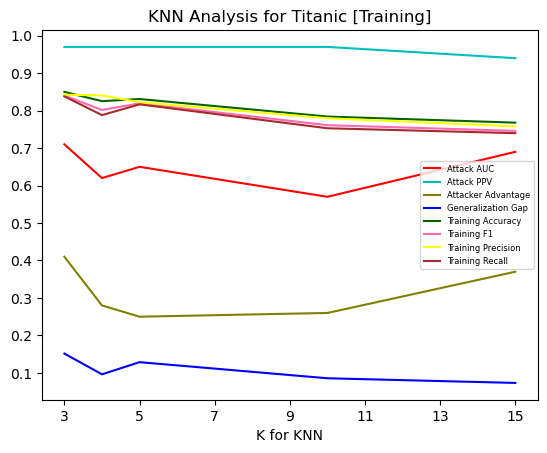

In [58]:
# create data
titanic_knn = df_knn.loc[df.Dataset=='Titanic']
titanic_knn.head()

x = titanic_knn.k_for_knn
gen_gap = titanic_knn.gen_gap
max_auc = titanic_knn.MAX_AUC
training_acc = titanic_knn.training_acc
training_f1 = titanic_knn.training_f1
training_ps = titanic_knn.training_ps
training_recall = titanic_knn.training_recall
max_ppv = titanic_knn.MAX_PPV
attacker_advantage = titanic_knn.MAX_Attacker_Advantage

plt.plot(x, max_auc, color = 'r', label = "Attack AUC")
plt.plot(x, max_ppv, color = 'c', label = "Attack PPV")
plt.plot(x, attacker_advantage, color = 'olive', label = "Attacker Advantage")

#Training Stuff
plt.plot(x, gen_gap, color = 'b', label = "Generalization Gap")
plt.plot(x, training_acc, color ='darkgreen', label = "Training Accuracy")
plt.plot(x, training_f1, color ='hotpink',label = "Training F1")
plt.plot(x, training_ps, color ='yellow', label = "Training Precision")
plt.plot(x, training_recall, color ='brown',label = "Training Recall")


plt.xlabel("K for KNN")
plt.title("KNN Analysis for Titanic [Training]")
plt.legend(loc=5, prop={'size': 6})
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0.1, 1.05, 0.1))
plt.show()

### Wine-Quality for KNN

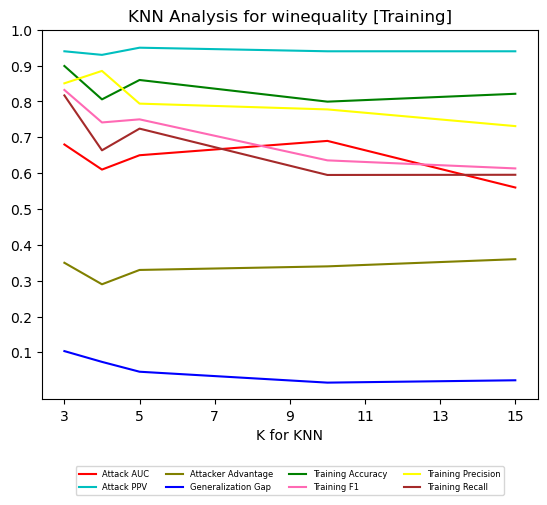

In [78]:
# create data
winequality_knn = df_knn.loc[df.Dataset=='wine-quality']
winequality_knn.head()

x = winequality_knn.k_for_knn
gen_gap = winequality_knn.gen_gap
max_auc = winequality_knn.MAX_AUC
training_acc = winequality_knn.training_acc
training_f1 = winequality_knn.training_f1
training_ps = winequality_knn.training_ps
training_recall = winequality_knn.training_recall
max_ppv = winequality_knn.MAX_PPV
attacker_advantage = winequality_knn.MAX_Attacker_Advantage

plt.plot(x, max_auc, color = 'r', label = "Attack AUC")
plt.plot(x, max_ppv, color = 'c', label = "Attack PPV")
plt.plot(x, attacker_advantage, color = 'olive', label = "Attacker Advantage")

#Training Stuff
plt.plot(x, gen_gap, color = 'b', label = "Generalization Gap")
plt.plot(x, training_acc, color ='g', label = "Training Accuracy")
plt.plot(x, training_f1, color ='hotpink',label = "Training F1")
plt.plot(x, training_ps, color ='yellow', label = "Training Precision")
plt.plot(x, training_recall, color ='brown',label = "Training Recall")


plt.xlabel("K for KNN")
plt.title("KNN Analysis for winequality [Training]")
plt.legend(ncol = 4, fontsize = 6, bbox_to_anchor =(0.5,-0.27), loc='lower center')
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0.1, 1.05, 0.1))
plt.show()

## AdultIncome for KNN

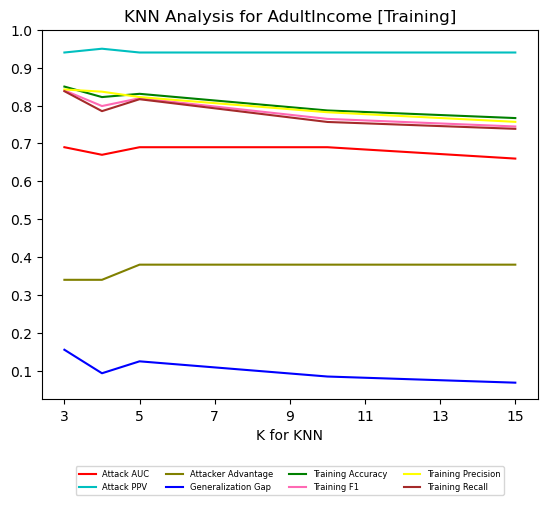

In [79]:
# create data
adultincome_knn = df_knn.loc[df.Dataset=='adultincome']
adultincome_knn.head()

x = adultincome_knn.k_for_knn
gen_gap = adultincome_knn.gen_gap
max_auc = adultincome_knn.MAX_AUC
training_acc = adultincome_knn.training_acc
training_f1 = adultincome_knn.training_f1
training_ps = adultincome_knn.training_ps
training_recall = adultincome_knn.training_recall
max_ppv = adultincome_knn.MAX_PPV
attacker_advantage = adultincome_knn.MAX_Attacker_Advantage

plt.plot(x, max_auc, color = 'r', label = "Attack AUC")
plt.plot(x, max_ppv, color = 'c', label = "Attack PPV")
plt.plot(x, attacker_advantage, color = 'olive', label = "Attacker Advantage")

#Training Stuff
plt.plot(x, gen_gap, color = 'b', label = "Generalization Gap")
plt.plot(x, training_acc, color ='g', label = "Training Accuracy")
plt.plot(x, training_f1, color ='hotpink',label = "Training F1")
plt.plot(x, training_ps, color ='yellow', label = "Training Precision")
plt.plot(x, training_recall, color ='brown',label = "Training Recall")


plt.xlabel("K for KNN")
plt.title("KNN Analysis for AdultIncome [Training]")
plt.legend(ncol = 4, fontsize = 6, bbox_to_anchor =(0.5,-0.27), loc='lower center')
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0.1, 1.05, 0.1))
plt.show()


# MLP

In [86]:
df_mlp = df.loc[df.model == 'MLP']
df_mlp.head()
df_mlp.shape

(15, 34)

## Titanic for MLP

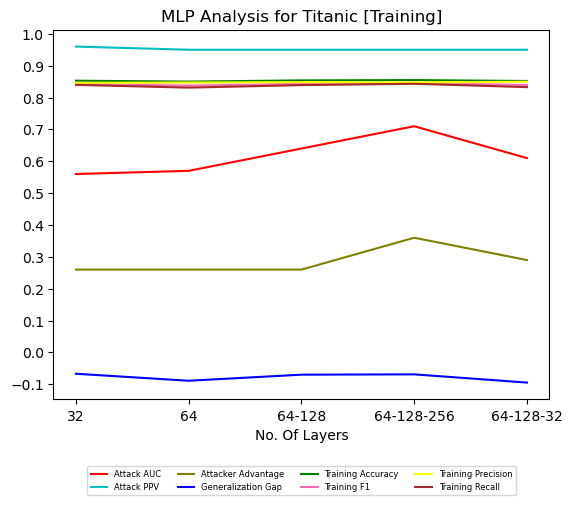

In [91]:
# create data
Titanic_mlp = df_mlp.loc[df.Dataset=='Titanic']
Titanic_mlp.head()

x = Titanic_mlp.layer_size
gen_gap = Titanic_mlp.gen_gap
max_auc = Titanic_mlp.MAX_AUC
training_acc = Titanic_mlp.training_acc
training_f1 = Titanic_mlp.training_f1
training_ps = Titanic_mlp.training_ps
training_recall = Titanic_mlp.training_recall
max_ppv = Titanic_mlp.MAX_PPV
attacker_advantage = Titanic_mlp.MAX_Attacker_Advantage

plt.plot(x, max_auc, color = 'r', label = "Attack AUC")
plt.plot(x, max_ppv, color = 'c', label = "Attack PPV")
plt.plot(x, attacker_advantage, color = 'olive', label = "Attacker Advantage")

#Training Stuff
plt.plot(x, gen_gap, color = 'b', label = "Generalization Gap")
plt.plot(x, training_acc, color ='g', label = "Training Accuracy")
plt.plot(x, training_f1, color ='hotpink',label = "Training F1")
plt.plot(x, training_ps, color ='yellow', label = "Training Precision")
plt.plot(x, training_recall, color ='brown',label = "Training Recall")


plt.xlabel("No. Of Layers")
plt.title("MLP Analysis for Titanic [Training]")
plt.legend(ncol = 4, fontsize = 6, bbox_to_anchor =(0.5,-0.27), loc='lower center')
#plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(-0.1, 1.05, 0.1))
plt.show()

## Winequality for MLP

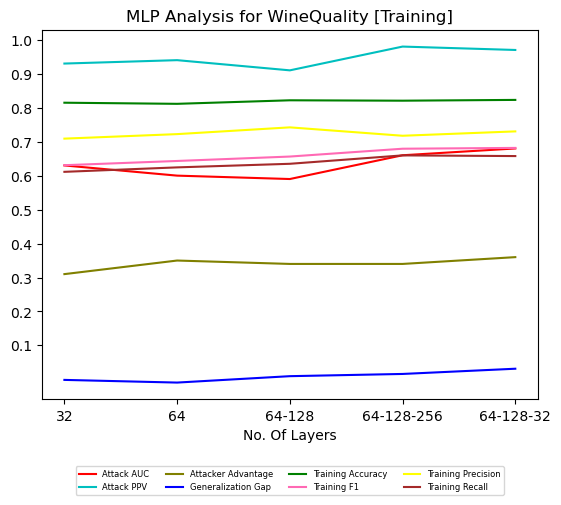

In [92]:
# create data
winequality_mlp = df_mlp.loc[df.Dataset=='wine-quality']
winequality_mlp.head()

x = winequality_mlp.layer_size
gen_gap = winequality_mlp.gen_gap
max_auc = winequality_mlp.MAX_AUC
training_acc = winequality_mlp.training_acc
training_f1 = winequality_mlp.training_f1
training_ps = winequality_mlp.training_ps
training_recall = winequality_mlp.training_recall
max_ppv = winequality_mlp.MAX_PPV
attacker_advantage = winequality_mlp.MAX_Attacker_Advantage

plt.plot(x, max_auc, color = 'r', label = "Attack AUC")
plt.plot(x, max_ppv, color = 'c', label = "Attack PPV")
plt.plot(x, attacker_advantage, color = 'olive', label = "Attacker Advantage")

#Training Stuff
plt.plot(x, gen_gap, color = 'b', label = "Generalization Gap")
plt.plot(x, training_acc, color ='g', label = "Training Accuracy")
plt.plot(x, training_f1, color ='hotpink',label = "Training F1")
plt.plot(x, training_ps, color ='yellow', label = "Training Precision")
plt.plot(x, training_recall, color ='brown',label = "Training Recall")


plt.xlabel("No. Of Layers")
plt.title("MLP Analysis for WineQuality [Training]")
plt.legend(ncol = 4, fontsize = 6, bbox_to_anchor =(0.5,-0.27), loc='lower center')
#plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0.1, 1.05, 0.1))
plt.show()

## AdultIncome for MLP

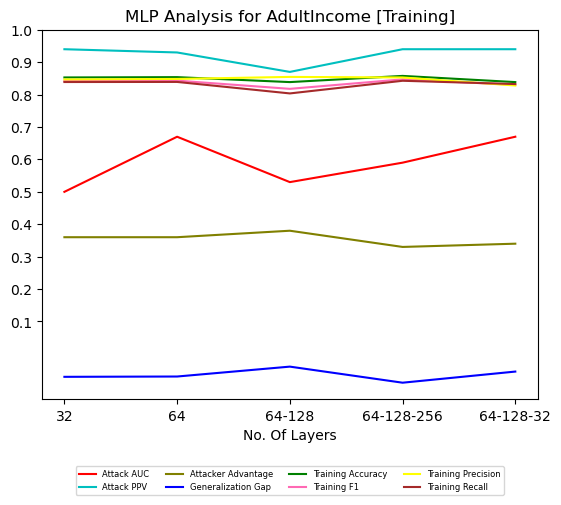

In [93]:
# create data
adultincome_mlp = df_mlp.loc[df.Dataset=='adultincome']
adultincome_mlp.head()

x = adultincome_mlp.layer_size
gen_gap = adultincome_mlp.gen_gap
max_auc = adultincome_mlp.MAX_AUC
training_acc = adultincome_mlp.training_acc
training_f1 = adultincome_mlp.training_f1
training_ps = adultincome_mlp.training_ps
training_recall = adultincome_mlp.training_recall
max_ppv = adultincome_mlp.MAX_PPV
attacker_advantage = adultincome_mlp.MAX_Attacker_Advantage

plt.plot(x, max_auc, color = 'r', label = "Attack AUC")
plt.plot(x, max_ppv, color = 'c', label = "Attack PPV")
plt.plot(x, attacker_advantage, color = 'olive', label = "Attacker Advantage")

#Training Stuff
plt.plot(x, gen_gap, color = 'b', label = "Generalization Gap")
plt.plot(x, training_acc, color ='g', label = "Training Accuracy")
plt.plot(x, training_f1, color ='hotpink',label = "Training F1")
plt.plot(x, training_ps, color ='yellow', label = "Training Precision")
plt.plot(x, training_recall, color ='brown',label = "Training Recall")


plt.xlabel("No. Of Layers")
plt.title("MLP Analysis for AdultIncome [Training]")
plt.legend(ncol = 4, fontsize = 6, bbox_to_anchor =(0.5,-0.27), loc='lower center')
#plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0.1, 1.05, 0.1))
plt.show()

# Decision Tree

In [94]:
df_dt = df.loc[df.model == 'DecisionTree']
df_dt.head()
df_dt.shape

(15, 34)

## Titanic for DecisionTree

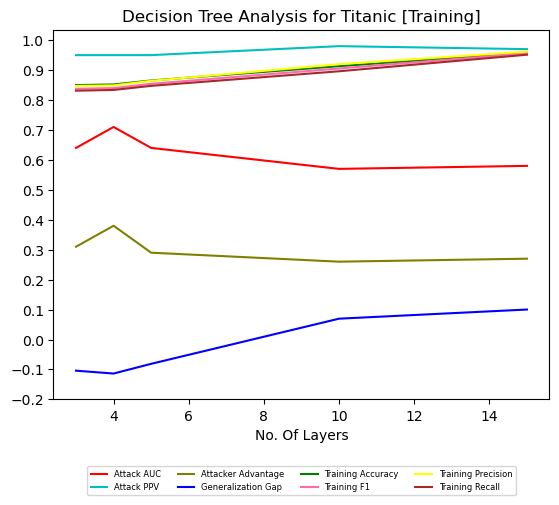

In [97]:
# create data
Titanic_dt = df_dt.loc[df.Dataset=='Titanic']
Titanic_dt.head()

x = Titanic_dt.depth_for_DT
gen_gap = Titanic_dt.gen_gap
max_auc = Titanic_dt.MAX_AUC
training_acc = Titanic_dt.training_acc
training_f1 = Titanic_dt.training_f1
training_ps = Titanic_dt.training_ps
training_recall = Titanic_dt.training_recall
max_ppv = Titanic_dt.MAX_PPV
attacker_advantage = Titanic_dt.MAX_Attacker_Advantage

plt.plot(x, max_auc, color = 'r', label = "Attack AUC")
plt.plot(x, max_ppv, color = 'c', label = "Attack PPV")
plt.plot(x, attacker_advantage, color = 'olive', label = "Attacker Advantage")

#Training Stuff
plt.plot(x, gen_gap, color = 'b', label = "Generalization Gap")
plt.plot(x, training_acc, color ='g', label = "Training Accuracy")
plt.plot(x, training_f1, color ='hotpink',label = "Training F1")
plt.plot(x, training_ps, color ='yellow', label = "Training Precision")
plt.plot(x, training_recall, color ='brown',label = "Training Recall")


plt.xlabel("No. Of Layers")
plt.title("Decision Tree Analysis for Titanic [Training]")
plt.legend(ncol = 4, fontsize = 6, bbox_to_anchor =(0.5,-0.27), loc='lower center')
#plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(-0.2, 1.05, 0.1))
plt.show()

## Winequality for Decision Tree

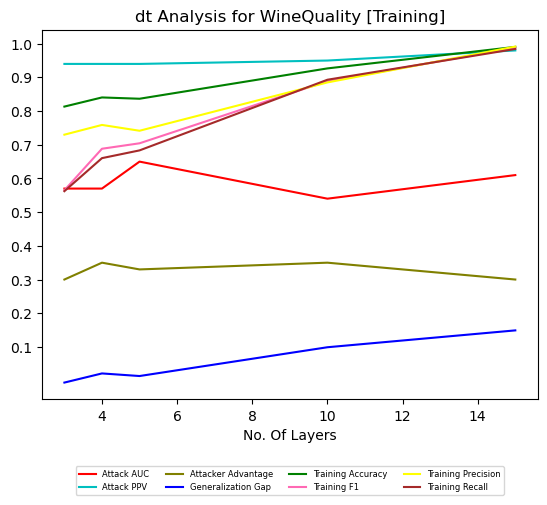

In [99]:
# create data
winequality_dt = df_dt.loc[df.Dataset=='wine-quality']
winequality_dt.head()

x = winequality_dt.depth_for_DT
gen_gap = winequality_dt.gen_gap
max_auc = winequality_dt.MAX_AUC
training_acc = winequality_dt.training_acc
training_f1 = winequality_dt.training_f1
training_ps = winequality_dt.training_ps
training_recall = winequality_dt.training_recall
max_ppv = winequality_dt.MAX_PPV
attacker_advantage = winequality_dt.MAX_Attacker_Advantage

plt.plot(x, max_auc, color = 'r', label = "Attack AUC")
plt.plot(x, max_ppv, color = 'c', label = "Attack PPV")
plt.plot(x, attacker_advantage, color = 'olive', label = "Attacker Advantage")

#Training Stuff
plt.plot(x, gen_gap, color = 'b', label = "Generalization Gap")
plt.plot(x, training_acc, color ='g', label = "Training Accuracy")
plt.plot(x, training_f1, color ='hotpink',label = "Training F1")
plt.plot(x, training_ps, color ='yellow', label = "Training Precision")
plt.plot(x, training_recall, color ='brown',label = "Training Recall")


plt.xlabel("No. Of Layers")
plt.title("dt Analysis for WineQuality [Training]")
plt.legend(ncol = 4, fontsize = 6, bbox_to_anchor =(0.5,-0.27), loc='lower center')
#plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0.1, 1.05, 0.1))
plt.show()

## AdultIncome for Decision Tree

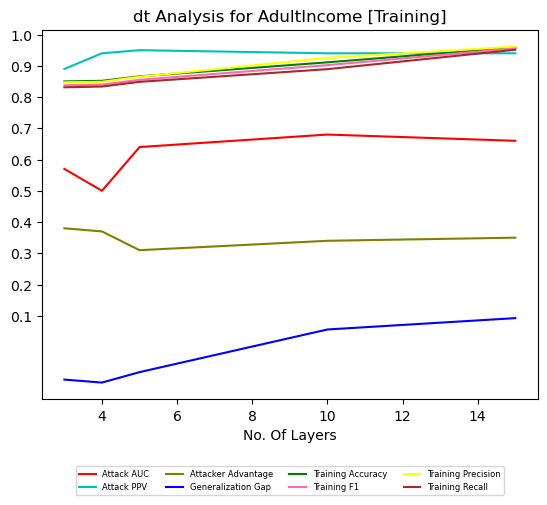

In [100]:
# create data
adultincome_dt = df_dt.loc[df.Dataset=='adultincome']
adultincome_dt.head()

x = adultincome_dt.depth_for_DT
gen_gap = adultincome_dt.gen_gap
max_auc = adultincome_dt.MAX_AUC
training_acc = adultincome_dt.training_acc
training_f1 = adultincome_dt.training_f1
training_ps = adultincome_dt.training_ps
training_recall = adultincome_dt.training_recall
max_ppv = adultincome_dt.MAX_PPV
attacker_advantage = adultincome_dt.MAX_Attacker_Advantage

plt.plot(x, max_auc, color = 'r', label = "Attack AUC")
plt.plot(x, max_ppv, color = 'c', label = "Attack PPV")
plt.plot(x, attacker_advantage, color = 'olive', label = "Attacker Advantage")

#Training Stuff
plt.plot(x, gen_gap, color = 'b', label = "Generalization Gap")
plt.plot(x, training_acc, color ='g', label = "Training Accuracy")
plt.plot(x, training_f1, color ='hotpink',label = "Training F1")
plt.plot(x, training_ps, color ='yellow', label = "Training Precision")
plt.plot(x, training_recall, color ='brown',label = "Training Recall")


plt.xlabel("No. Of Layers")
plt.title("dt Analysis for AdultIncome [Training]")
plt.legend(ncol = 4, fontsize = 6, bbox_to_anchor =(0.5,-0.27), loc='lower center')
#plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0.1, 1.05, 0.1))
plt.show()